# NumPy, Pandas, Matplotlib

In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

## NumPy

#### 1. (1 балл) Написать функцию, которая принимает на вход два целочисленных массива одинаковой длины, и возвращает минимальный и максимальный из тех элементов этих двух массивов у которых совпадает и позиция и значение (то есть из всех элементов $\{a[i]: a[i] = b[i]\}$)

    Например, для a = np.array([4, 2, 6, 3]) и b = np.array([4, 3, 6, -3]) ответом является кортеж (4, 6).

In [12]:
def minMaxEqual(a, b):
    x=a[a==b]
    return min(x), max(x)

In [13]:
a = np.array([4, 2, 6, 3])
b = np.array([4, 3, 6, -3])
minMaxEqual(a, b)

(4, 6)

#### 2. (2 балла) Дан numpy-вектор v длины n+1, который задает полином степени n. Найти вторую производную этого полинома (Например np.array([3, 0, 7, 1]) соответствует полиному 3+7x^2+x^3)

    Для вектора из примера функция должна будет выдавать np.array([14, 6])

In [14]:
def second_derivative(v):
    n=len(v)
    v=v*np.array(range(0,n))
    v=v[1:]
    v=v*np.array(range(0,n-1))
    v=v[1:]
    return v

In [15]:
v=np.array([3, 0, 7, 1]) 
second_derivative(v)

array([14,  6])

#### 3. (1 балл) Дана матрица X и два вектора одинаковой длины i и j. Написать функцию, которая возвращает вектор np.array, состоящий из последовательности элементов $[X[i[0], j[0]], X[i[1], j[1]], ..., X[i[N-1], j[N-1]]]$. 

In [16]:
def constructArray(X, i, j):
    return X[i,j]

In [17]:
i = np.array([1, 1, 1])
j = np.array([0, 1, 2])
X = np.array([[1, 2, 3],[4, 5, 6],[7, 8, 9]])
constructArray(X, i, j)

array([4, 5, 6])

#### 4. (2 балла) Написать функцию, возвращающую максимальный элемент в векторе x среди элементов, перед которыми стоит нулевой.

    Для x = np.array([6, 2, 0, 3, 0, 0, 5, 7, 0]) ответом является 5.

In [18]:
def prevZeroMax(x):
    a=x==0
    b=np.append(x,1)
    b=b[1:]
    c=b[a].max()
    return c

In [117]:
x = np.array([0, 18, 0, 3, 0, 0, 20, 0,19])
prevZeroMax(x)

20

#### 5. (2 балла) Напишите функцию, которая принимает параметры lims: ndarray размера 2, k: float, b: float, n: int, noise_level: float и возвращает выборку из n объектов, сгенерированную по правилу y = kx + b + U[-noise_level; noise_level]. x генерируется равномерно из U[lims[0]; lims[1]] (U[a, b] — равномерное распределение на [a, b]). Функция должна возвращать кортеж, первым элементом которого будет массив x, и вторым элементом массив y — значения функции в точках этого массива.

In [19]:
def gen_data(lims, k, b, n, noise_level):
    x=np.random.uniform(lims[0], lims[1], n)
    y=k*x+b+np.random.uniform(-noise_level, noise_level, n)
    return x,y

In [119]:
gen_data([0,100], 1.5, 0, 5, 5.5)

(array([  3.00353731,  86.64465321,  64.14958823,  67.73443961,  57.76163998]),
 array([   3.84967129,  124.76293271,   98.11999278,  100.69490377,
          83.48234506]))

#### 6. (2 балла) Напишите функцию, которая вычисляет следующее матричное произведение: $x * x.T + a * I + b$. Здесь x и b — массивы np.array размерности N (одномерные, считаются вектор-столбцом). a — число, I — матрица, состоящая единиц на главной диагонали и нулей в остальных местах (единичная матрица). Сложение вектора b с матрицей x * x.T должно осуществляться по столбцам (вектор b должен прибавиться к каждому столбцу матрицы независимо).

    Например, для x = np.array([[1],[2],[3]]), b = np.array([[0], [-2], [1]]), a = 4.5 функция должна выдавать 
    np.array([[5.5, 2.0, 3.0], [0.0, 6.5, 4.0], [4.0, 7.0, 14.5]])
$x*x.T$ - матричное произведение

In [20]:
def calc_value(x, b, a):
    y=x.reshape(1,len(x))
    q = np.dot(x,y) + a*np.eye(len(x)) + b
    return q

In [121]:
x = np.array([[1],[2],[3]])
b = np.array([[0], [-2], [1]])
a = 4.5
calc_value(x, b, a)

array([[  5.5,   2. ,   3. ],
       [  0. ,   6.5,   4. ],
       [  4. ,   7. ,  14.5]])

## Pandas

Данные: http://www.machinelearning.ru/wiki/images/3/32/Titanic.zip

#### 0. (0.5 балла) Загрузите данные в DataFrame и выведите его. Также напечатайте количество объектов и количество признаков (используйте функцию print):

In [50]:
data = pd.read_csv('train.csv')
print("amount of objects = {}, amount of attributes = {}".format(data.shape[0], data.shape[1]))
data.head()

amount of objects = 891, amount of attributes = 12


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


#### 1. (0.5 балла) Какие встречаются типы признаков? Придумайте постановку трех задач, которые можно решать, используя полученные данные: классификации, регрессии и кластеризации.

In [123]:
#Бинарные (Survived, Sex), Вещестенные (Age, Fare, SibSp), Порядковые (Pclass), Категориальные (Cabin, Embarked)
#Регрессия: по цене билета определить возраст пассажира
#Классификация: определить класс билета по цене
#Кластеризация: сегментация пассажиров по социальному положению исходя из возраста, стоимости билета и тд.

#### 2. (0.5 балла) Сохраните в переменную firstclass_num количество пассажиров, которые ехали первым классом, и выведите ее с помощью функции print().

In [51]:
firstclass_num=len(data[data.Pclass==1])
print(firstclass_num)

216


#### 3. (0.5 балла) Выведите минимальный, максимальный и средний возраст пассажиров.

In [52]:
print(data["Age"].min())
print(data["Age"].max())
print(data["Age"].mean())

0.42
80.0
29.69911764705882


#### 4. (1 балл) Напечатайте стандартное отклонение цены билетов на Титаник

In [53]:
print(data["Fare"].std())

49.693428597180905


#### 5. (1 балл) Посчитайте коэффициент корреляции ценой на билет и возрастом пассажиров.

In [54]:
data.corr()["Fare"]["Age"]

0.096066691769038814

#### 6. (2 балла) Создайте DataFrame в котором будет находиться средний возраст выживших пассажиров по каждому классу. Ваш код должен быть масштабируемым (то есть, должен работать при добавлении новых классов к исходному DataFrame'у).

In [69]:
newdata=data.loc[:,['Pclass','Age']]
newdata=newdata.groupby("Pclass").mean()
newdata.head()

,Age
Pclass,
1,37.048118
2,29.866958
3,26.403259


#### 7. (2 балла) Посчитайте какой части пассажиров удалось выжить. Посчитайте отношение количества выживших мужчин к количеству выживших женщинам.

In [59]:
new_data=data[data.Survived==1]
print(len(new_data)/len(data))
print(len(new_data[new_data.Sex=="male"])/len(new_data[new_data.Sex=="female"]))

0.3838383838383838
0.4678111587982833


#### 8. (1 балл) Верно ли, что чаще выживали пассажиры с более дорогими билетами? Кратко опишите в комментариях к коду, какие величины вы хотите посчитать, чтобы ответить на этот вопрос.

In [60]:
k=data["Fare"].median()
new_data1=data[data["Fare"]<=k]
new_data2=data[data["Fare"]>k]
print(new_data1.Survived.mean())
print(new_data2.Survived.mean())
# Из пассажиров с более дорогими билетами (цена билета больше медианного значения) выжила примерно половина,
# с менее дорогими билетами (меньше медианного значения) выжила примерно четверть, следовательно выживали чаще

0.2505592841163311
0.5180180180180181


#### 9. (1 балл) Замените все NaN в колонке Age на средние значения возраста по всем пассажирам.

In [61]:
data["Age"].fillna(data["Age"].mean(), inplace = True)
data['Age']

0      22.000000
1      38.000000
2      26.000000
3      35.000000
4      35.000000
5      29.699118
6      54.000000
7       2.000000
8      27.000000
9      14.000000
10      4.000000
11     58.000000
12     20.000000
13     39.000000
14     14.000000
15     55.000000
16      2.000000
17     29.699118
18     31.000000
19     29.699118
20     35.000000
21     34.000000
22     15.000000
23     28.000000
24      8.000000
25     38.000000
26     29.699118
27     19.000000
28     29.699118
29     29.699118
         ...    
861    21.000000
862    48.000000
863    29.699118
864    24.000000
865    42.000000
866    27.000000
867    31.000000
868    29.699118
869     4.000000
870    26.000000
871    47.000000
872    33.000000
873    47.000000
874    28.000000
875    15.000000
876    20.000000
877    19.000000
878    29.699118
879    56.000000
880    25.000000
881    33.000000
882    22.000000
883    28.000000
884    25.000000
885    39.000000
886    27.000000
887    19.000000
888    29.6991

## Matplotlib

#### 1. (3 балла) Используя функцию из задания №5 по numpy (gen_data), отобразите на графике сгенерированную выборку, а также настоящую прямую из которой выборка была получена. Добавьте на этот график прямую, которая приближает выборку, обучив для этого простейшую линейную регрессию.

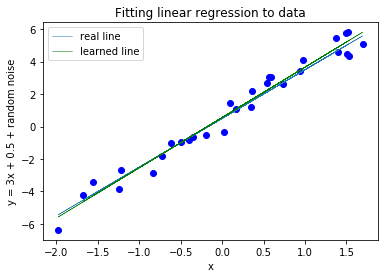

In [73]:
from sklearn.linear_model import LinearRegression as LR
k=3
b=0.5
data_x, data_y = gen_data([-2, 2], 3, 0.5, 30,1)
regr = LR()
regr.fit(data_x.reshape(-1, 1), data_y)
k_learned, b_learned = regr.coef_, regr.intercept_
plt.plot(data_x, data_y, "bo")
plt.plot(data_x, data_x * k + b, lw=0.5, label="real line")
plt.plot(data_x, data_x * k_learned + b_learned, "g",lw=0.5, label="learned line")
plt.legend()
plt.title("Fitting linear regression to data")
plt.xlabel("x")
plt.ylabel("y = 3x + 0.5 + random noise")
plt.show()

#### 2. (2 балла) Проверьте визуально полученную при выполнении задания №5 по pandas информацию о корреляции между ценой на билет и возрастом пассажира. Для этого предлагается отобразить все данные, откладывая на одной оси возраст пассажира, а на другой цену билета. Каждая точка должна быть визуально оботражена в виде треугольника зеленого цвета, направленного вниз. Сделайте возможность регулировать величину маркера (например, пусть она передается в качестве параметра в функцию, которая рисует график).

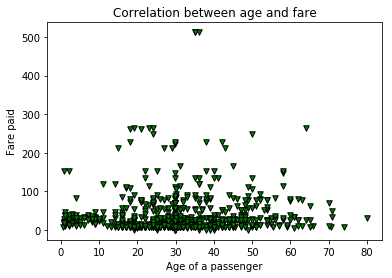

In [72]:
def qwe(a):
    x1=data["Age"]
    y1=data["Fare"]
    plt.scatter(x1, y1, c="g", marker="v", s=a, edgecolor = 'black')
    plt.title("Correlation between age and fare")
    plt.xlabel("Age of a passenger")
    plt.ylabel("Fare paid")
    plt.show()
qwe(30)

#### 3. (3 балла) Отобразите гистограмму распределения возрастов для каждого класса пассажиров (здесь опять нужно использовать данные из заданий по pandas). В результате вы должны получить три гистограммы, которые необходимо отобразить рядом друг с другом используя функцию plt.subplots. Каждая гистограмма должна быть нормирована.

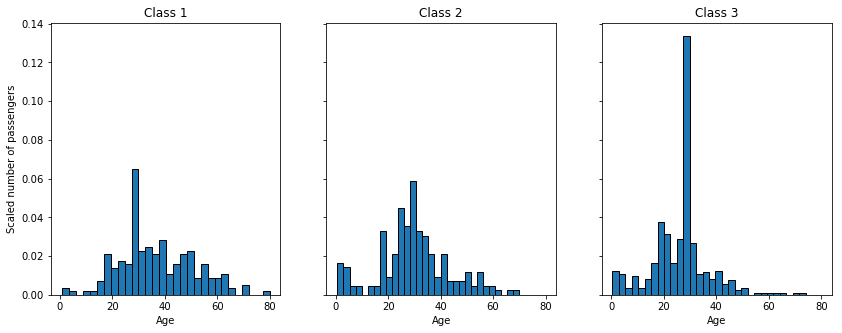

In [71]:
fig, axis = plt.subplots(1, 3, sharey = True, sharex = True, figsize = (14,5))
axis[0].hist(data[data.Pclass == 1]["Age"].dropna(), normed = 1, bins = 30, edgecolor = 'black') 
axis[0].set_title('Class 1') 
axis[0].set_ylabel('Scaled number of passengers')
axis[0].set_xlabel('Age') 
axis[1].hist(data[data.Pclass == 2]["Age"].dropna(), normed = 1, bins = 30, edgecolor = 'black') 
axis[1].set_title('Class 2') 
axis[1].set_xlabel('Age') 
axis[2].hist(data[data.Pclass == 3]["Age"].dropna(), normed = 1, bins = 30, edgecolor = 'black') 
axis[2].set_title('Class 3') 
axis[2].set_xlabel('Age')
plt.show()

#### 4. (2 балла) Отобразите на графике синим цветом функцию y(x), а также ее доверительный интервал в виде закрашенной зеленым цветом области от y[i] - error[i] до y[i] + error[i].


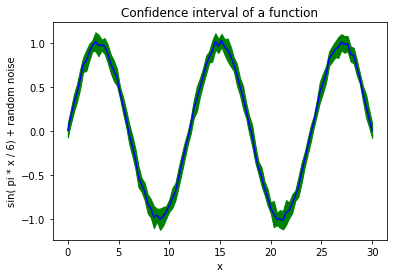

In [70]:
def gen_uncertain_data():
    x = np.linspace(0, 30, 100)
    y = np.sin(x/6*np.pi) + np.random.normal(0, 0.02, size=x.shape)
    error = np.random.normal(0.1, 0.02, size=y.shape)
    return x, y, error
x,y,error = gen_uncertain_data()
plt.xlabel('x')
plt.plot(x, y, color = 'b')
plt.fill_between(x,y - error, y + error, color = 'g')
plt.ylabel('sin( pi * x / 6) + random noise')
plt.title('Confidence interval of a function')
plt.show()